In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_excel('data_location.xlsx')
data.head()

,No,Latitude,Longitude,Name Places
0,1,-6.217812,106.801503,Gelora Bung Karno Stadium
1,2,-6.171908,106.822932,National Monument
2,3,-6.300999,106.891330,Taman Mini Indonesia Indah
3,4,-6.259832,106.887996,Halim Perdana Kusuma Airport
4,5,-6.168766,106.821122,Merdeka Palace


In [21]:
data.isna().sum()

No             0
Latitude       0
Longitude      0
Name Places    0
dtype: int64

In [32]:
data.max()

No                                     16
Latitude                        -6.129121
Longitude                      106.905163
Name Places    Taman Mini Indonesia Indah
dtype: object

In [33]:
data.min()

No                      1
Latitude        -6.300999
Longitude      106.666664
Name Places         Ancol
dtype: object

In [34]:
data.mean()

C:\Users\ryann\AppData\Local\Temp\ipykernel_6376\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


No             8.500000
Latitude      -6.194649
Longitude    106.822494
dtype: float64

In [35]:
data.median()

C:\Users\ryann\AppData\Local\Temp\ipykernel_6376\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


No             8.500000
Latitude      -6.173170
Longitude    106.821427
dtype: float64

In [22]:
X = data[['Latitude', 'Longitude']]
X.columns = ['Latitude','Longitude']

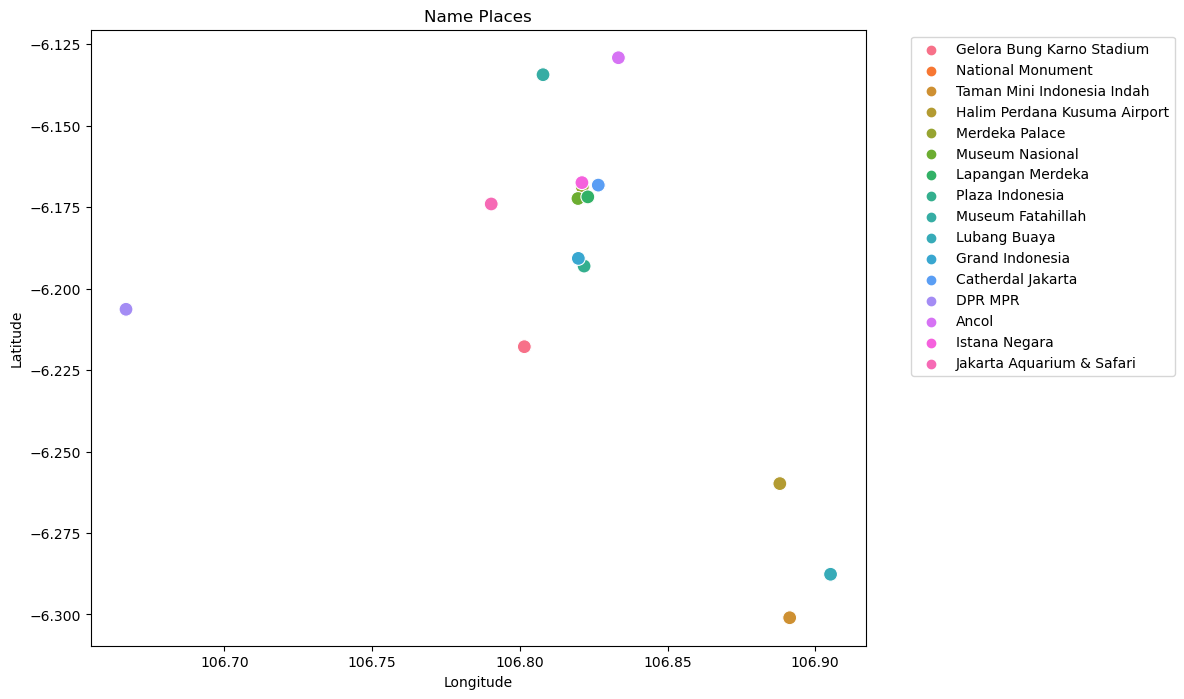

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Name Places', s=100)
plt.title('Name Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [24]:
from sklearn.cluster import KMeans
#initialize model
kmeans = KMeans(n_clusters=5)

In [25]:
#define X sama fitting model
X_train = X[['Latitude', 'Longitude']]
kmeans.fit(X_train)

C:\Users\ryann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [26]:
X['y_cluster'] = kmeans.predict(X_train)
print(np.unique(X['y_cluster']))

[0 1 2 3 4]


C:\Users\ryann\AppData\Local\Temp\ipykernel_6376\1959172742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y_cluster'] = kmeans.predict(X_train)


In [27]:
X

,Latitude,Longitude,y_cluster
0,-6.217812,106.801503,0
1,-6.171908,106.822932,3
2,-6.300999,106.891330,2
3,-6.259832,106.887996,2
4,-6.168766,106.821122,3
5,-6.172333,106.819663,3
6,-6.171833,106.822997,3
7,-6.193067,106.821731,0
8,-6.134333,106.807830,4
9,-6.287666,106.905163,2


<function matplotlib.pyplot.show(close=None, block=None)>

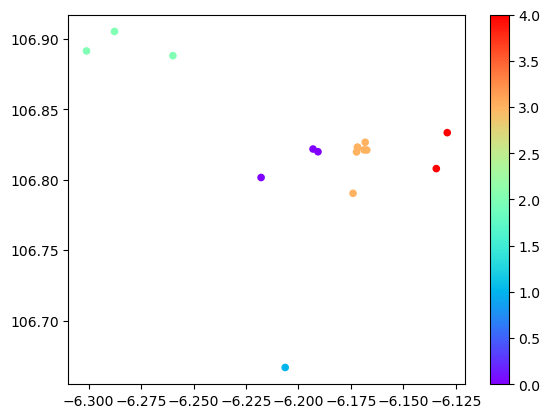

In [28]:
plt.scatter(X['Latitude'], X['Longitude'], c=X['y_cluster'], s=20, cmap='rainbow')
plt.colorbar()
plt.show

[[ -6.20052963 106.81434105]
 [ -6.20633251 106.666664  ]
 [ -6.2828322  106.89482975]
 [ -6.17064556 106.81779224]
 [ -6.1317269  106.82059005]]


<function matplotlib.pyplot.show(close=None, block=None)>

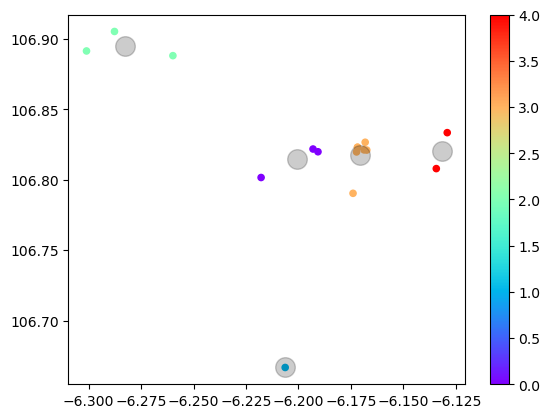

In [29]:
centers = kmeans.cluster_centers_
print(centers)

plt.scatter(X['Latitude'], X['Longitude'], c=X['y_cluster'], s=20, cmap = 'rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.2) #plot center
plt.show

In [30]:
X.groupby('y_cluster')[['Latitude', 'Longitude', 'y_cluster']].agg({'Latitude': 'mean',
                                                              'Longitude' : 'mean', 'y_cluster' : 'count'})

,Latitude,Longitude,y_cluster
y_cluster,,,
0,-6.200530,106.814341,3
1,-6.206333,106.666664,1
2,-6.282832,106.894830,3
3,-6.170646,106.817792,7
4,-6.131727,106.820590,2


In [31]:
#prediksi hasil
Latitude_A = 80
Longitude_A = 20

kmeans.predict([[Latitude_A, Longitude_A ]])

C:\Users\ryann\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])